# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data for ML Project

In [3]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.shape

(7043, 21)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Setting Display options to ensure feature name visibility

In [7]:
pd.set_option('display.max_columns',None)

# Warning Suppression 

In [8]:
import warnings
warnings.filterwarnings('ignore')

# How many rows have missing ID ?

In [9]:
df['customerID'].isnull().sum()

0

# Drop ID Feature from the dataset

In [10]:
df=df.drop(['customerID'],axis=1)

# Label the Churn feature to 1/0

In [11]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [12]:
df['target']=np.where(df['Churn']=="Yes",1,0)

# Drop the Churn feature to retain only Target 

In [13]:
df=df.drop(['Churn'],axis=1)

# Defining Target and Independent Features

In [14]:
Y=df[['target']]
X=df.drop(['target'],axis=1)

# Get the Churn Rate

In [15]:
Y.mean()

target    0.26537
dtype: float64

# Split features into Numerical and Categorical

In [16]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

In [17]:
num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [18]:
#Check whether SeniorCitizon feaure is an indicator
num.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [19]:
char.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


# Dropping the indicator features from num to build a separate DF

In [20]:
ind=num[['SeniorCitizen']]
num=num.drop(['SeniorCitizen'],axis=1)

In [21]:
num.dtypes

tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [22]:
ind.dtypes

SeniorCitizen    int64
dtype: object

In [23]:
char.dtypes

gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
dtype: object

# Outlier Analysis of Numerical Features

In [24]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.798992
std,24.559481,30.090047,2266.730170
min,0.000000,18.250000,18.800000
1%,1.000000,19.200000,19.871000
5%,1.000000,19.650000,49.070000
10%,2.000000,20.050000,83.470000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000


# Capping and Flooring of outliers

In [25]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [26]:
num=num.apply(lambda x : outlier_cap(x))

In [27]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.372710,64.749689,2277.243407
std,24.557454,30.062810,2260.002318
min,1.000000,19.200000,19.871000
1%,1.000000,19.200000,19.883180
5%,1.000000,19.650000,49.070000
10%,2.000000,20.050000,83.470000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000


# Missing Value Analysis

In [28]:
num.isnull().mean()

tenure            0.0
MonthlyCharges    0.0
TotalCharges      0.0
dtype: float64

In [30]:
# Since the data does not contain any missing values Imputation Processes are not required

# Feature Selection - Numerical Features 

# Part 1 : Remove Features with 0 Variance

In [31]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [32]:
num_1.iloc[0]

tenure             1.00
MonthlyCharges    29.85
TotalCharges      29.85
Name: 0, dtype: float64

# Part 2 - Bi Variate Analysis (Feature Discretization)

In [33]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Rank')
num_binned.head()

,tenure_Rank,MonthlyCharges_Rank,TotalCharges_Rank
0,0.0,2.0,0.0
1,5.0,3.0,5.0
2,1.0,3.0,1.0
3,6.0,2.0,5.0
4,1.0,5.0,1.0


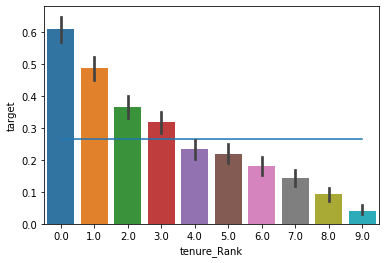

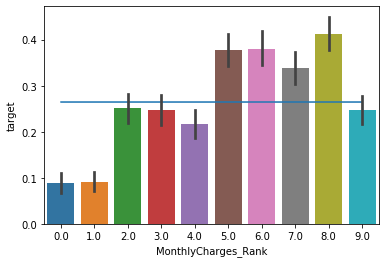

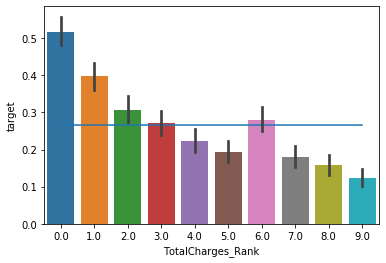

In [35]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

#percentage_income_goesinto_intallments=Insallment/annual_inc (Derived Variables/Feature Engineering)

X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_bin_combined['target'].mean(),data=X_bin_combined)
    sns.barplot(x=col, y="target",data=X_bin_combined, estimator=mean )
plt.show()

In [36]:
# All features from num_1 will get selected due to good discrimination
# thus no selection of K best features required
select_features_df_num=num_1

In [37]:
num_1.shape

(7043, 3)

In [38]:
select_features_df_num.shape

(7043, 3)

# Feature Selection - Categorical Features 

In [39]:
char.dtypes

gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
dtype: object

# Part 1 - Bi Variate Analysis

CATEGORICAL DOES NOT NEED DISCRITIZATION

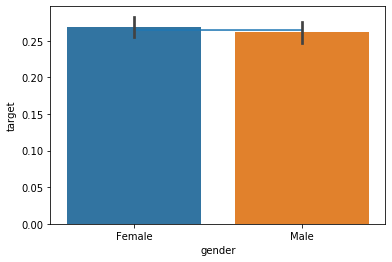

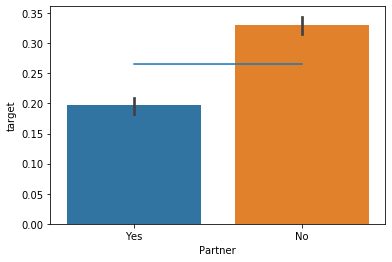

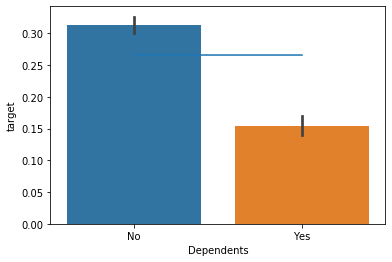

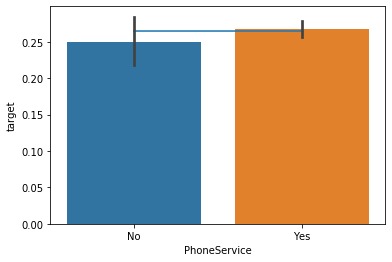

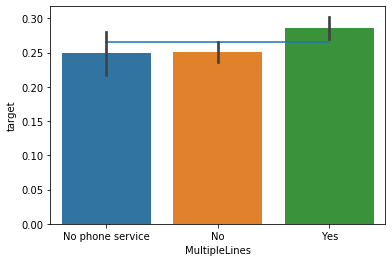

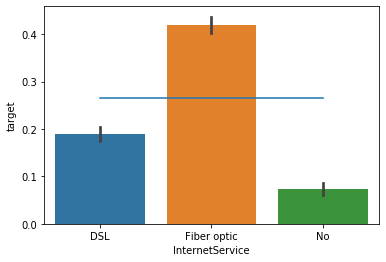

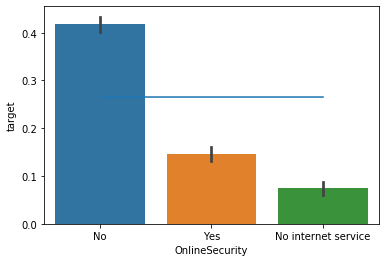

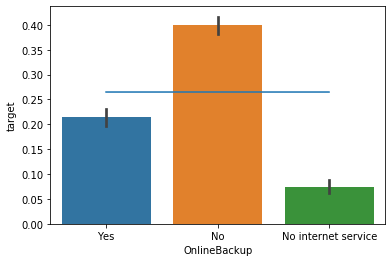

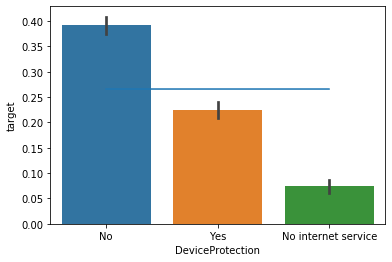

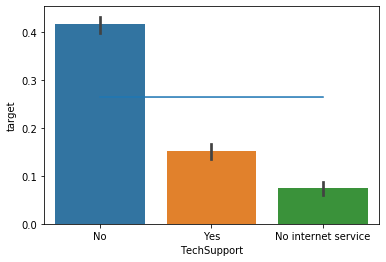

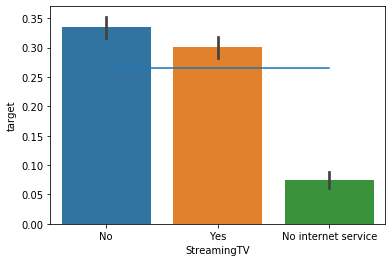

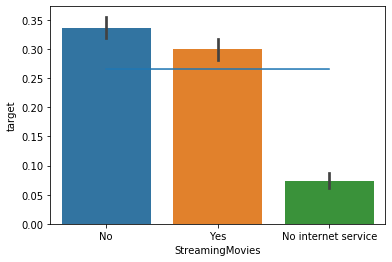

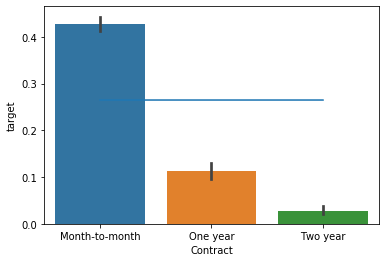

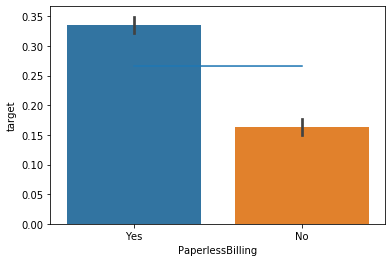

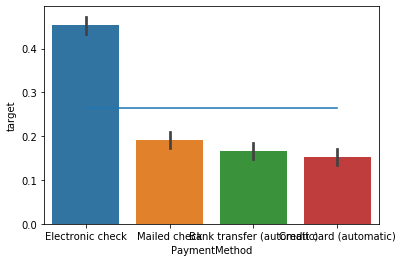

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_char_merged['target'].mean(),data=X_char_merged)
    sns.barplot(x=col, y="target",data=X_char_merged, estimator=mean )
plt.show()

In [42]:
char=char.drop(['gender','PhoneService','MultipleLines'],axis=1)

In [43]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(7043, 22)

# Part 2 - Select K Best

In [44]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=20)
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [46]:
select_features_df_char.shape

(7043, 20)

In [45]:
select_features_df_char.iloc[0]

Partner_Yes                              1
Dependents_Yes                           0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         1
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingMovies_No internet service      0
Contract_One year                        0
Contract_Two year                        0
PaperlessBilling_Yes                     1
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           1
PaymentMethod_Mailed check               0
Name: 0, dtype: uint8

# Feature Selection - Numerical Indicator Features 

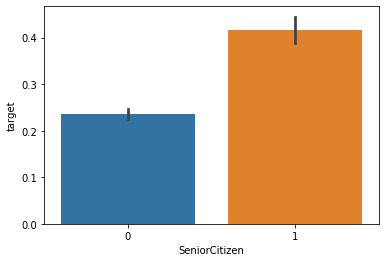

In [47]:
X_ind_merged=pd.concat([Y,ind],axis=1,join='inner')
from numpy import mean
for col in (ind.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_ind_merged, estimator=mean )
plt.show()

In [48]:
select_features_df_ind=ind

# Creating the Master Feature Set for Model Development

In [49]:
X_all=pd.concat([select_features_df_char,select_features_df_num,select_features_df_ind],axis=1,join="inner")

In [50]:
Y['target'].value_counts()

0    5174
1    1869
Name: target, dtype: int64

# Train Test Split

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=10)

In [52]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (4930, 24)
Shape of Testing Data (2113, 24)
Response Rate in Training Data target    0.266126
dtype: float64
Response Rate in Testing Data target    0.263606
dtype: float64


# Model Build UP

In [53]:
# Non Linearity in feature relationships are observed which makes tree methods a good choice
# There are few options to consider among tree methods
# White Box (Completely Explainable Set of Rules) - Decision Tree
# Ensemble Methods - Random Forest (With Bagging)
# Ensemble Methods - GBM/XGBoost (Boosting)

In [55]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [56]:
# checking for the coeff as Log Reg is a statistical model.
coeff_df=pd.DataFrame(X_all.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,Partner_Yes,0.010673
1,Dependents_Yes,-0.095012
2,InternetService_Fiber optic,0.598123
3,InternetService_No,-0.173241
4,OnlineSecurity_No internet service,-0.173241
5,OnlineSecurity_Yes,-0.616836
6,OnlineBackup_No internet service,-0.173241
7,OnlineBackup_Yes,-0.299833
8,DeviceProtection_No internet service,-0.173241
9,DeviceProtection_Yes,-0.019946


In [57]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

In [58]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 6, 'min_samples_split': 50}


In [59]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=50, random_state=0)

In [62]:
! pip install pydotplus

^C


In [60]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[50,10])
tree.plot_tree(dtree,filled=True,fontsize=15,rounded=True,feature_names=X_all.columns)
plt.show()

ModuleNotFoundError: No module named 'pydotplus'

In [63]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_split=50, random_state=0)

In [64]:
import pandas as pd
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
tenure,0.200408
TotalCharges,0.149898
InternetService_Fiber optic,0.115766
PaymentMethod_Electronic check,0.086082
MonthlyCharges,0.084691
Contract_Two year,0.076559
OnlineSecurity_Yes,0.038781
Contract_One year,0.035319
InternetService_No,0.028913
TechSupport_Yes,0.027326


In [65]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=50)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=6, min_samples_split=50,
                           random_state=0)

In [66]:
import pandas as pd
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
tenure,0.207963
TotalCharges,0.185813
MonthlyCharges,0.166751
PaymentMethod_Electronic check,0.137275
InternetService_Fiber optic,0.133763
Contract_Two year,0.036155
Contract_One year,0.033409
PaperlessBilling_Yes,0.019680
OnlineSecurity_Yes,0.014681
TechSupport_Yes,0.013139


# Stacking Classifier Model.

In [68]:
base_learners = [
                        ('rf', RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)),
                        ('gbm', GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=50))  
                       ] 

In [69]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

In [70]:
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=6,
                                                       min_samples_split=50,
                                                       random_state=0)),
                               ('gbm',
                                GradientBoostingClassifier(criterion='mse',
                                                           max_depth=6,
                                                           min_samples_split=50,
                                                           random_state=0))],
                   final_estimator=LogisticRegression())

# Model Evaluation

In [71]:
# Model Evaluation
y_pred_logreg=logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)
y_pred_stacking=clf.predict(X_test)

In [72]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [73]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision",metrics.precision_score(y_test,y_pred_logreg))
print("Recall",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score",metrics.f1_score(y_test,y_pred_logreg))

Accuracy: 0.79649787032655
Precision 0.6365591397849463
Recall 0.5314183123877917
f1_score 0.5792563600782779


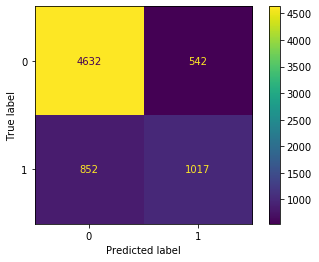

In [74]:
metrics.plot_confusion_matrix(logreg,X_all,Y)

In [75]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.7950780880265026
Precision 0.6455399061032864
Recall 0.49371633752244165
f1_score 0.5595116988809766


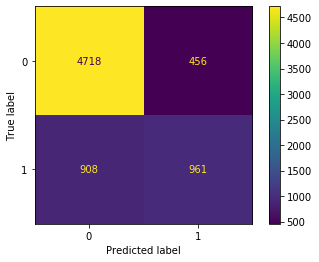

In [76]:
metrics.plot_confusion_matrix(dtree,X_all,Y)

In [77]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.7983909133932797
Precision 0.6641604010025063
Recall 0.4757630161579892
f1_score 0.5543933054393305


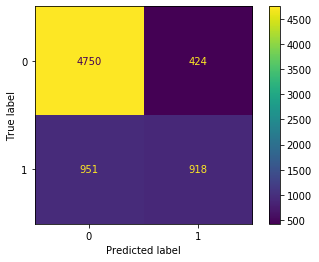

In [78]:
metrics.plot_confusion_matrix(rf,X_all,Y)

In [79]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.7974443918599148
Precision 0.6423841059602649
Recall 0.5224416517055656
f1_score 0.5762376237623762


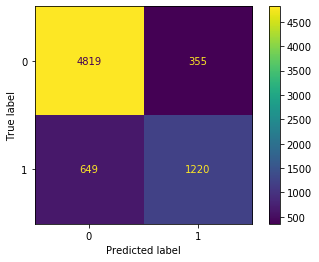

In [80]:
metrics.plot_confusion_matrix(gbm,X_all,Y)

In [81]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_stacking))
print("Precision",metrics.precision_score(y_test,y_pred_stacking))
print("Recall",metrics.recall_score(y_test,y_pred_stacking))
print("f1_score",metrics.f1_score(y_test,y_pred_stacking))

Accuracy: 0.8007572172266919
Precision 0.6552511415525114
Recall 0.5152603231597845
f1_score 0.5768844221105527


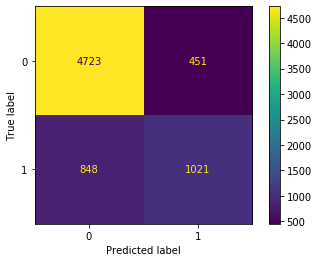

In [82]:
metrics.plot_confusion_matrix(clf,X_all,Y)

# Lorenz Curve

Probability analysis of the data

# Logistic Regression Lorenz Curve

In [83]:
y_pred_prob = logreg.predict_proba(X_all)[:, 1]
df['pred_prob_logreg']=pd.DataFrame(y_pred_prob)
df['P_Rank_logreg']=pd.qcut(df['pred_prob_logreg'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_logreg')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_logreg')['pred_prob_logreg'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_logreg',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_logreg,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.758865,0.734979,535.0,535.0,0.286249,0.286249,170.0,170.0,0.032857,0.032857,0.2534,0.100099,0.100099,1
1,9,704,0.575284,0.594199,405.0,940.0,0.216693,0.502943,299.0,469.0,0.057789,0.090646,0.4123,0.099957,0.200057,2
2,8,704,0.441761,0.459874,311.0,1251.0,0.166399,0.669342,393.0,862.0,0.075957,0.166602,0.5027,0.099957,0.300014,3
3,7,704,0.305398,0.328382,215.0,1466.0,0.115035,0.784377,489.0,1351.0,0.094511,0.261113,0.5233,0.099957,0.399972,4
4,6,704,0.228693,0.218736,161.0,1627.0,0.086142,0.870519,543.0,1894.0,0.104948,0.366061,0.5045,0.099957,0.499929,5
5,5,705,0.160284,0.145551,113.0,1740.0,0.060460,0.930979,592.0,2486.0,0.114418,0.480479,0.4505,0.100099,0.600028,6
6,4,704,0.090909,0.091718,64.0,1804.0,0.034243,0.965222,640.0,3126.0,0.123695,0.604175,0.3610,0.099957,0.699986,7
7,3,704,0.052557,0.051707,37.0,1841.0,0.019797,0.985019,667.0,3793.0,0.128914,0.733089,0.2519,0.099957,0.799943,8
8,2,704,0.024148,0.024314,17.0,1858.0,0.009096,0.994114,687.0,4480.0,0.132779,0.865868,0.1282,0.099957,0.899901,9
9,1,705,0.015603,0.007843,11.0,1869.0,0.005886,1.000000,694.0,5174.0,0.134132,1.000000,0.0000,0.100099,1.000000,10


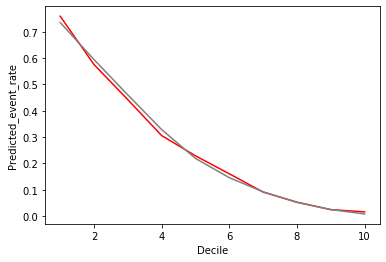

In [84]:
ax = sns.lineplot( x="Decile", y="Actutal_event_rate", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey')

# Decsion Tree Lorenz Curve

In [85]:
y_pred_prob = dtree.predict_proba(X_all)[:, 1]
df['pred_prob_dtree']=pd.DataFrame(y_pred_prob)
df['P_Rank_tree']=pd.qcut(df['pred_prob_dtree'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_tree')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_tree')['pred_prob_dtree'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_tree',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_tree,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.757447,0.775697,534.0,534.0,0.285714,0.285714,171.0,171.0,0.033050,0.033050,0.2527,0.100099,0.100099,1
1,9,704,0.600852,0.612564,423.0,957.0,0.226324,0.512039,281.0,452.0,0.054310,0.087360,0.4247,0.099957,0.200057,2
2,8,704,0.420455,0.440659,296.0,1253.0,0.158373,0.670412,408.0,860.0,0.078856,0.166216,0.5042,0.099957,0.300014,3
3,7,704,0.329545,0.325437,232.0,1485.0,0.124131,0.794543,472.0,1332.0,0.091225,0.257441,0.5371,0.099957,0.399972,4
4,6,704,0.198864,0.198429,140.0,1625.0,0.074906,0.869449,564.0,1896.0,0.109007,0.366448,0.5030,0.099957,0.499929,5
5,5,705,0.156028,0.152310,110.0,1735.0,0.058855,0.928304,595.0,2491.0,0.114998,0.481446,0.4469,0.100099,0.600028,6
6,4,704,0.120739,0.101395,85.0,1820.0,0.045479,0.973783,619.0,3110.0,0.119637,0.601082,0.3727,0.099957,0.699986,7
7,3,704,0.041193,0.039016,29.0,1849.0,0.015516,0.989299,675.0,3785.0,0.130460,0.731542,0.2578,0.099957,0.799943,8
8,2,704,0.017045,0.016893,12.0,1861.0,0.006421,0.995720,692.0,4477.0,0.133746,0.865288,0.1304,0.099957,0.899901,9
9,1,705,0.011348,0.003096,8.0,1869.0,0.004280,1.000000,697.0,5174.0,0.134712,1.000000,-0.0000,0.100099,1.000000,10


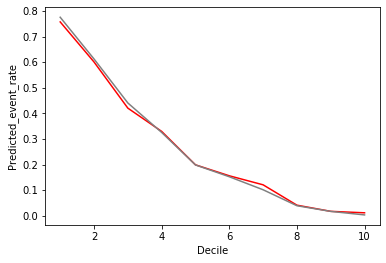

In [86]:
ax = sns.lineplot( x="Decile", y="Actutal_event_rate", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey')

# Random Forest Lorenz Curve

In [88]:
y_pred_prob = rf.predict_proba(X_all)[:, 1]
df['pred_prob_rf']=pd.DataFrame(y_pred_prob)
df['P_Rank_rf']=pd.qcut(df['pred_prob_rf'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_rf')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_rf')['pred_prob_rf'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_rf',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_rf,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.767376,0.684186,541.0,541.0,0.289460,0.289460,164.0,164.0,0.031697,0.031697,0.2578,0.100099,0.100099,1
1,9,704,0.596591,0.543542,420.0,961.0,0.224719,0.514179,284.0,448.0,0.054890,0.086587,0.4276,0.099957,0.200057,2
2,8,704,0.454545,0.426888,320.0,1281.0,0.171215,0.685393,384.0,832.0,0.074217,0.160804,0.5246,0.099957,0.300014,3
3,7,704,0.322443,0.318193,227.0,1508.0,0.121455,0.806849,477.0,1309.0,0.092192,0.252996,0.5539,0.099957,0.399972,4
4,6,704,0.220170,0.243803,155.0,1663.0,0.082932,0.889781,549.0,1858.0,0.106107,0.359103,0.5307,0.099957,0.499929,5
5,5,705,0.126241,0.179210,89.0,1752.0,0.047619,0.937400,616.0,2474.0,0.119057,0.478160,0.4592,0.100099,0.600028,6
6,4,704,0.096591,0.125750,68.0,1820.0,0.036383,0.973783,636.0,3110.0,0.122922,0.601082,0.3727,0.099957,0.699986,7
7,3,704,0.048295,0.078972,34.0,1854.0,0.018192,0.991974,670.0,3780.0,0.129494,0.730576,0.2614,0.099957,0.799943,8
8,2,704,0.019886,0.038930,14.0,1868.0,0.007491,0.999465,690.0,4470.0,0.133359,0.863935,0.1355,0.099957,0.899901,9
9,1,705,0.001418,0.018429,1.0,1869.0,0.000535,1.000000,704.0,5174.0,0.136065,1.000000,0.0000,0.100099,1.000000,10


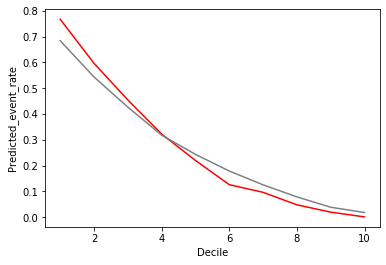

In [89]:
ax = sns.lineplot( x="Decile", y="Actutal_event_rate", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey')

# GBM Lorenz Curze

In [90]:
y_pred_prob = gbm.predict_proba(X_all)[:, 1]
df['pred_prob_gbm']=pd.DataFrame(y_pred_prob)
df['P_Rank_GBM']=pd.qcut(df['pred_prob_gbm'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_GBM')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_GBM')['pred_prob_gbm'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_GBM',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_GBM,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.912057,0.813446,643.0,643.0,0.344034,0.344034,62.0,62.0,0.011983,0.011983,0.3321,0.100099,0.100099,1
1,9,704,0.680398,0.617223,479.0,1122.0,0.256287,0.600321,225.0,287.0,0.043487,0.055470,0.5449,0.099957,0.200057,2
2,8,704,0.480114,0.458661,338.0,1460.0,0.180845,0.781166,366.0,653.0,0.070738,0.126208,0.6550,0.099957,0.300014,3
3,7,704,0.275568,0.310075,194.0,1654.0,0.103799,0.884965,510.0,1163.0,0.098570,0.224778,0.6602,0.099957,0.399972,4
4,6,704,0.157670,0.196081,111.0,1765.0,0.059390,0.944355,593.0,1756.0,0.114612,0.339389,0.6050,0.099957,0.499929,5
5,5,705,0.073759,0.121384,52.0,1817.0,0.027822,0.972178,653.0,2409.0,0.126208,0.465597,0.5066,0.100099,0.600028,6
6,4,704,0.038352,0.071405,27.0,1844.0,0.014446,0.986624,677.0,3086.0,0.130847,0.596444,0.3902,0.099957,0.699986,7
7,3,704,0.026989,0.035787,19.0,1863.0,0.010166,0.996790,685.0,3771.0,0.132393,0.728836,0.2680,0.099957,0.799943,8
8,2,704,0.007102,0.016955,5.0,1868.0,0.002675,0.999465,699.0,4470.0,0.135099,0.863935,0.1355,0.099957,0.899901,9
9,1,705,0.001418,0.009773,1.0,1869.0,0.000535,1.000000,704.0,5174.0,0.136065,1.000000,0.0000,0.100099,1.000000,10


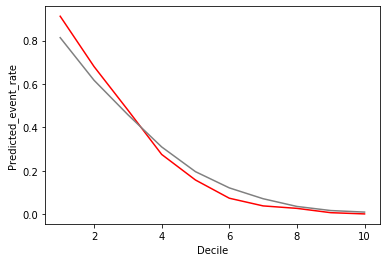

In [91]:
ax = sns.lineplot( x="Decile", y="Actutal_event_rate", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey')

In [92]:
y_pred_prob = clf.predict_proba(X_all)[:, 1]
df['pred_prob_stacking']=pd.DataFrame(y_pred_prob)
df['P_Rank_stacking']=pd.qcut(df['pred_prob_stacking'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_stacking')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_stacking')['pred_prob_stacking'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_stacking',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_stacking,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.801418,0.778403,565.0,565.0,0.302301,0.302301,140.0,140.0,0.027058,0.027058,0.2752,0.100099,0.100099,1
1,9,704,0.603693,0.598533,425.0,990.0,0.227394,0.529695,279.0,419.0,0.053923,0.080982,0.4487,0.099957,0.200057,2
2,8,704,0.473011,0.418635,333.0,1323.0,0.178170,0.707865,371.0,790.0,0.071705,0.152687,0.5552,0.099957,0.300014,3
3,7,704,0.313920,0.267497,221.0,1544.0,0.118245,0.826110,483.0,1273.0,0.093351,0.246038,0.5801,0.099957,0.399972,4
4,6,704,0.208807,0.182710,147.0,1691.0,0.078652,0.904762,557.0,1830.0,0.107654,0.353692,0.5511,0.099957,0.499929,5
5,5,705,0.124823,0.129678,88.0,1779.0,0.047084,0.951846,617.0,2447.0,0.119250,0.472942,0.4789,0.100099,0.600028,6
6,4,704,0.076705,0.097574,54.0,1833.0,0.028892,0.980738,650.0,3097.0,0.125628,0.598570,0.3822,0.099957,0.699986,7
7,3,704,0.036932,0.075471,26.0,1859.0,0.013911,0.994650,678.0,3775.0,0.131040,0.729610,0.2650,0.099957,0.799943,8
8,2,704,0.012784,0.060543,9.0,1868.0,0.004815,0.999465,695.0,4470.0,0.134325,0.863935,0.1355,0.099957,0.899901,9
9,1,705,0.001418,0.054294,1.0,1869.0,0.000535,1.000000,704.0,5174.0,0.136065,1.000000,0.0000,0.100099,1.000000,10


In [93]:
# Project Conclusion :- 
# The GBM Model has performed the best and will be used for Customer targeting with Loan offers
# Since Monthly Income and Existing EMI are the most important features for the GBM model
# We will build a Business Value Metric based on Existing EMI/Monthly Income
# Low Values of this ratio will indicate valueable customers
# Within the High Value group, we can leverage the model to identify the best targets

In [94]:
# which customer has low tenure rank
df['Tenure_Rank']=pd.qcut(df['tenure'].rank(method='first').values,10,duplicates='drop').codes+1

In [95]:
df.groupby('Tenure_Rank')['tenure'].agg(['min','max','mean'])

,min,max,mean
Tenure_Rank,,,
1,0,2,1.099291
2,2,6,3.566761
3,6,12,8.779830
4,12,20,15.531250
5,20,29,24.153191
6,29,40,34.004261
7,40,50,45.014205
8,50,60,55.370739
9,60,69,65.001420


In [96]:
df['tenure'].mean()

32.37114865824223

In [97]:
df['Tenure_Segment']=np.where(df['Tenure_Rank']<=6,"Low Tenure","High Tenure")

In [98]:
df['MonthlyCharges_Rank']=pd.qcut(df['MonthlyCharges'].rank(method='first').values,10,duplicates='drop').codes+1

In [99]:
df.groupby('MonthlyCharges_Rank')['MonthlyCharges'].agg(['min','max','mean'])

,min,max,mean
MonthlyCharges_Rank,,,
1,18.25,20.05,19.622482
2,20.05,25.05,21.732599
3,25.05,45.85,35.514773
4,45.85,58.75,52.532244
5,58.85,70.35,65.314965
6,70.35,79.10,74.623864
7,79.10,85.50,82.140057
8,85.50,94.25,89.840199
9,94.25,102.60,98.036364


In [100]:
df['MonthlyCharges'].mean()

64.76169246059922

In [101]:
df['Monthly_Charge_Segment']=np.where(df['MonthlyCharges_Rank']<=5,"Low Charges","High Charges")

In [102]:
df['Predicted_Churn_Rank']=np.where(df['P_Rank_GBM']>=8,"Top 3","Bottom 7")

# Slice the data with respect to Top 4 and Bottom 6 Probability Ranks from the GBM Model

In [103]:
df_top3=df.loc[df['Predicted_Churn_Rank']=='Top 3',:]

In [112]:
service_list=['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'
              ,'StreamingTV','StreamingMovies','Contract','PaperlessBilling']
#target=['target']

#total=service_list+target

In [114]:
df_top3_services=df_top3[service_list]

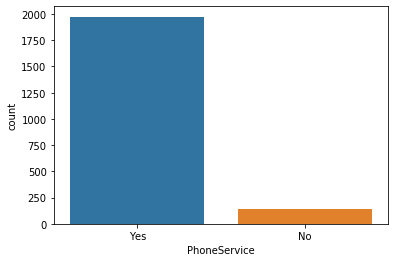

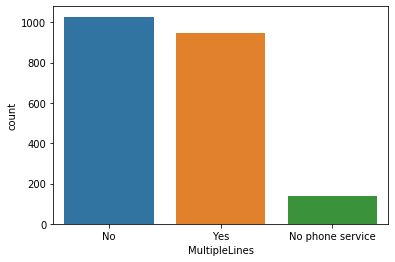

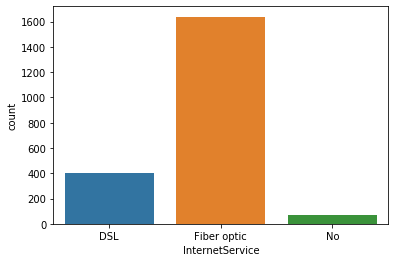

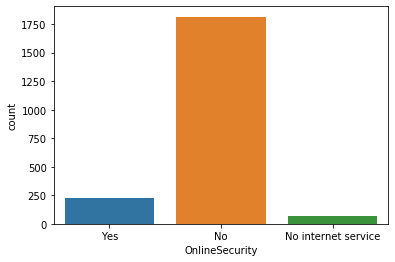

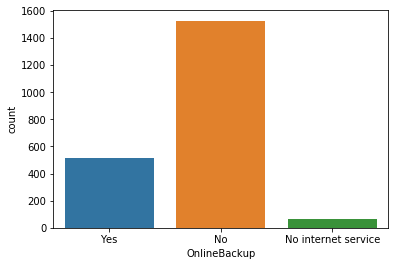

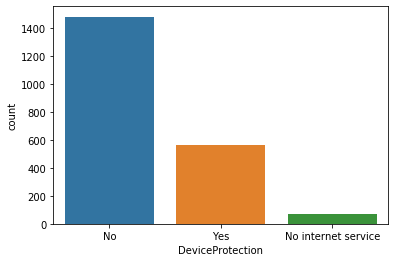

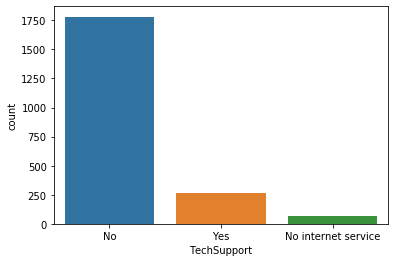

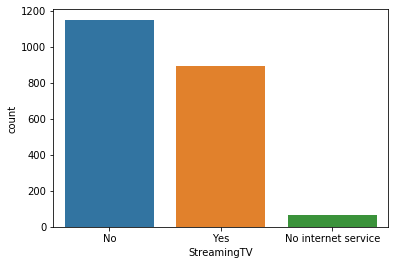

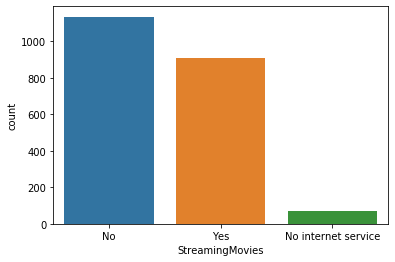

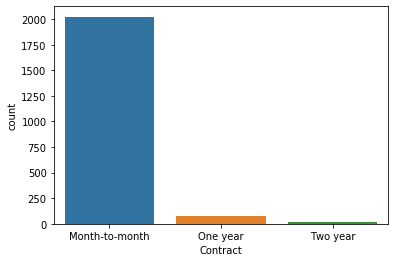

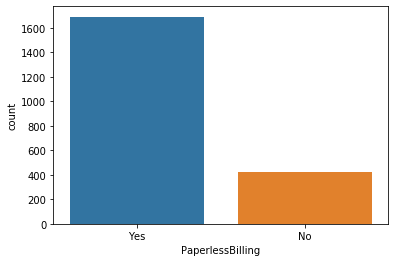

In [115]:
for col in (df_top3_services.columns):
    plt.figure()
    sns.countplot(x=col,data=df_top3_services)
plt.show()

In [107]:
pd.crosstab(index=df_top3['Monthly_Charge_Segment'], columns=df_top3['Tenure_Segment'],values=df_top3['MonthlyCharges'],aggfunc='mean')

Tenure_Segment,High Tenure,Low Tenure
Monthly_Charge_Segment,,
High Charges,99.889737,86.625057
Low Charges,44.785714,48.050422


In [108]:
pd.crosstab(index=df_top3['Monthly_Charge_Segment'], columns=df_top3['Tenure_Segment'],values=df_top3['target'],aggfunc='count')

Tenure_Segment,High Tenure,Low Tenure
Monthly_Charge_Segment,,
High Charges,190,1317
Low Charges,14,592


In [109]:
# Recommendations
# Device Protection with Online Services
# Convert customer to DSL if they are facing challenges with Fiber Optics
# Offer discounts on Yearly contracts